<a href="https://colab.research.google.com/github/lauraceciliadiazdavila/IA-LIDeSIA-Dpto-Computacion/blob/main/02_Curaci%C3%B3n_Visualizaci%C3%B3n/2025_2_Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

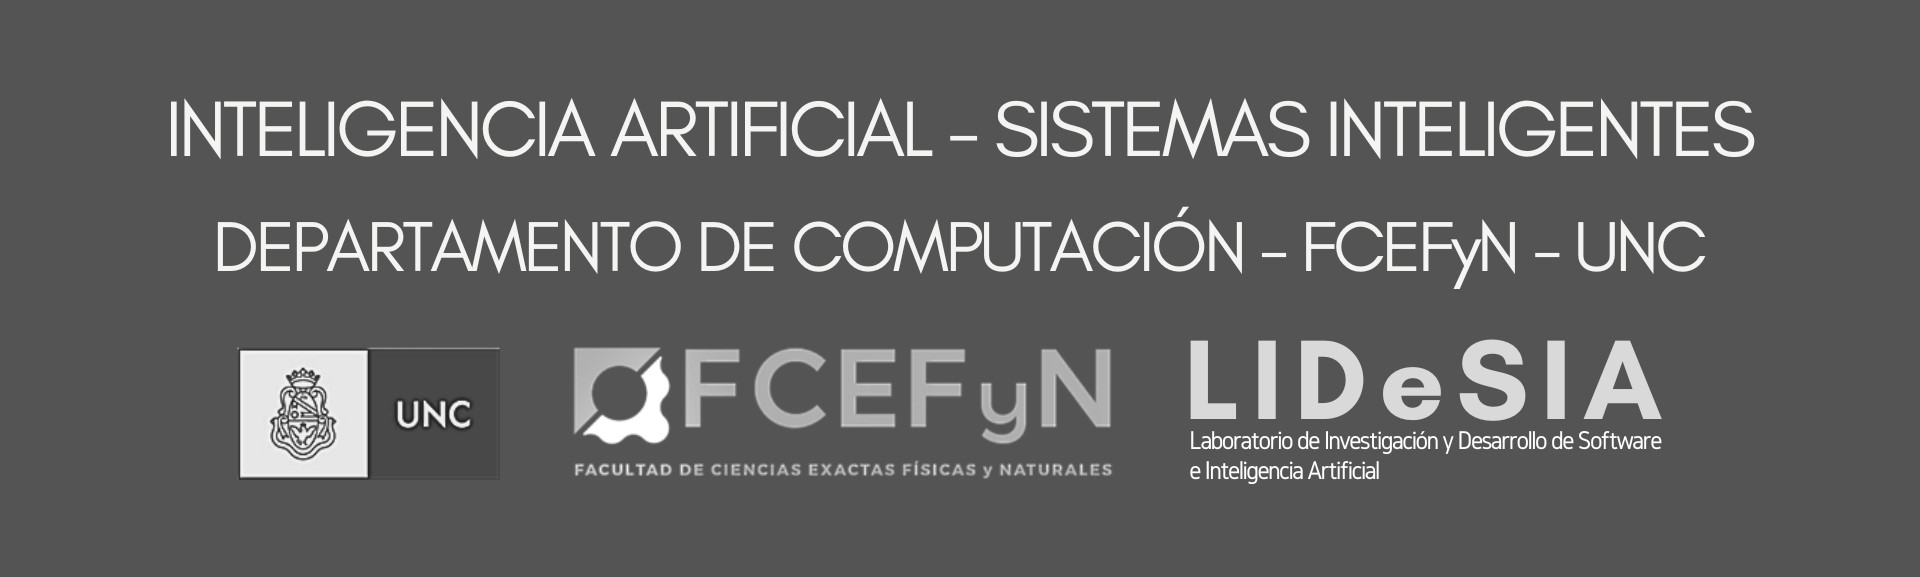

# Random Forest
---


FCEFyN - UNC - Cátedra de Inteligencia Artificial

---

*   Autor/es: Ing. Sandro Mauricio Comerci (LIDeSIA - FCEFyN)

*   Directora: Dra. Laura Cecilia Diaz Davila (LIDeSIA - FCEFyN)

*   Revisión (2025-2): Mgtr. Ing. Mauro Furer (FCEFyN)

---



In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Descarga del dataset

Descargamos el dataset desde kaggle, en este caso son registros del clima en diferentes ciudades de Australia

In [45]:
import kagglehub
import os

path = kagglehub.dataset_download("caillemaxence/rain-in-australia-cleaned-dataset")

print("Path to dataset files:", path)

clima = pd.read_csv("/kaggle/input/rain-in-australia-cleaned-dataset/clean_dataset_rain_in_australia.csv")

Path to dataset files: /kaggle/input/rain-in-australia-cleaned-dataset


# Exploramos

Visualizamos en principio la información básica del dataset

In [46]:
clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140787 entries, 0 to 140786
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140787 non-null  float64
 3   MaxTemp        140787 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    140787 non-null  float64
 6   Sunshine       140787 non-null  float64
 7   WindGustDir    140787 non-null  object 
 8   WindGustSpeed  140787 non-null  float64
 9   WindDir9am     140787 non-null  object 
 10  WindDir3pm     140787 non-null  object 
 11  WindSpeed9am   140787 non-null  float64
 12  WindSpeed3pm   140787 non-null  float64
 13  Humidity9am    140787 non-null  float64
 14  Humidity3pm    140787 non-null  float64
 15  Pressure9am    140787 non-null  float64
 16  Pressure3pm    140787 non-null  float64
 17  Cloud9am       140787 non-nul

**En principio tenemos features:**


Numéricas: temperaturas, humedad, presión, lluvia, evaporación, viento, nubes, sol.

Categóricas: ciudad (Location), direcciones de viento (Wind-Dir), etc

Temporales: fecha (Date, Year, Month, Day).

Target: vamos a utilizar RainTomorrow.

vemos que no hay muestras con nulos

Hacemos una inspección de los datos

In [47]:
clima.head(90)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0   2008-12-01   Albury     13.4     22.9       0.6     5.116752    8.5775   
1   2008-12-02   Albury      7.4     25.1       0.0     5.116752    8.5775   
2   2008-12-03   Albury     12.9     25.7       0.0     5.116752    8.5775   
3   2008-12-04   Albury      9.2     28.0       0.0     5.116752    8.5775   
4   2008-12-05   Albury     17.5     32.3       1.0     5.116752    8.5775   
..         ...      ...      ...      ...       ...          ...       ...   
85  2009-02-26   Albury     15.0     32.7       0.0     5.116752    8.5775   
86  2009-02-27   Albury     15.4     32.6       0.0     5.116752    8.5775   
87  2009-02-28   Albury     16.0     34.5       0.0     5.116752    8.5775   
88  2009-03-01   Albury     12.8     30.3       0.0     5.116752    8.5775   
89  2009-03-02   Albury     13.2     31.9       0.0     5.116752    8.5775   

   WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm  Cloud9am  Cloud3pm  \
0            W           44.0          W  ...      1007.1       8.0       5.0   
1          WNW           44.0        NNW  ...      1007.8       7.0       5.0   
2          WSW           46.0          W  ...      1008.7       7.0       2.0   
3           NE           24.0         SE  ...      1012.8       7.0       5.0   
4            W           41.0        ENE  ...      1006.0       7.0       8.0   
..         ...            ...        ...  ...         ...       ...       ...   
85         ESE           26.0        ESE  ...      1015.0       7.0       5.5   
86           W           24.0        SSE  ...      1012.6       7.0       5.5   
87         WSW           44.0          E  ...      1004.6       7.0       5.5   
88           W           30.0          W  ...      1008.7       7.0       5.0   
89         NNW           35.0          S  ...      1011.6       7.0       5.0   

    Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0      16.9     21.8         No            No  2008     12    1  
1      17.2     24.3         No            No  2008     12    2  
2      21.0     23.2         No            No  2008     12    3  
3      18.1     26.5         No            No  2008     12    4  
4      17.8     29.7        Yes            No  2008     12    5  
..      ...      ...        ...           ...   ...    ...  ...  
85     20.7     30.5         No            No  2009      2   26  
86     20.0     30.8         No            No  2009      2   27  
87     22.2     33.6         No            No  2009      2   28  
88     17.3     28.1         No            No  2009      3    1  
89     18.0     29.8         No            No  2009      3    2  

[90 rows x 26 columns]

Puedo ver las ciudades que están registradas

In [48]:
print(clima["Location"].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


# Pre-procesamiento




*   Reemplazamos los valores "yes/no" por "1/0" en la columna "RainToday" y "RainTomorrow"
*   Nos quedamos con la ciudad de "Melbourne" para este ejemplo
*   Descartamos algunas columnas que no van a ser de interés en este ejemplo



In [49]:
# mapeos
clima["RainToday"] = clima["RainToday"].map({"Yes": 1, "No": 0})
clima["RainTomorrow"] = clima["RainTomorrow"].map({"Yes": 1, "No": 0})

# elijo ciudad
clima_one_city_all_features = clima[clima["Location"] == "Melbourne"]

# descarto columnas
clima_one_city_features_filtered = clima_one_city_all_features.drop(columns=['RainToday', 'Date', 'Location'])
clima_one_city_features_filtered.head(10)

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
64991      9.5     15.4       2.0          2.8       7.0           W   
64992     11.0     14.5       0.6          5.2       4.0           W   
64993      8.4     14.1       1.4          2.0       0.8           W   
64994      9.1     14.5       0.6          1.8       4.2           E   
64995      4.3     15.5       0.0          0.8       8.4           N   
64996      5.5     15.4       0.0          2.8       3.0           N   
64997     11.5     14.3       0.0          3.0       1.0         NNE   
64998      6.9     10.4       5.0          1.2       0.3           N   
64999      3.6     14.8       1.2          0.4       6.5           N   
65000      4.2     13.5       3.0          2.2       7.0         WNW   

       WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Pressure9am  \
64991           63.0          W          W          37.0  ...       1006.8   
64992           63.0          W        WSW          30.0  ...       1013.4   
64993           39.0          W          W          17.0  ...       1024.8   
64994           19.0        NNW          N           9.0  ...       1030.2   
64995           52.0          N        NNE          24.0  ...       1028.9   
64996           74.0          N        NNW          31.0  ...       1023.1   
64997           57.0          N          N          28.0  ...       1016.3   
64998           37.0          N          N          13.0  ...       1017.1   
64999           35.0          N        WSW          11.0  ...       1023.1   
65000           69.0          N        WNW          15.0  ...       1009.4   

       Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainTomorrow  Year  \
64991       1010.3       1.0       7.0     11.0     14.6             0  2008   
64992       1016.2       7.0       4.0     11.8     13.7             1  2008   
64993       1024.3       7.0       7.0     10.6     13.9             0  2008   
64994       1029.0       7.0       6.0     10.2     13.1             0  2008   
64995       1024.9       2.0       5.0      5.5     14.6             0  2008   
64996       1020.1       6.0       6.0     11.6     14.6             0  2008   
64997       1012.9       8.0       7.0     12.2     13.3             1  2008   
64998       1017.0       8.0       7.0      7.3     10.3             1  2008   
64999       1019.6       1.0       7.0      4.2     13.1             1  2008   
65000       1006.7       6.0       3.0      9.0     12.2             0  2008   

       Month  Day  
64991      7    1  
64992      7    2  
64993      7    3  
64994      7    4  
64995      7    5  
64996      7    6  
64997      7    7  
64998      7    8  
64999      7    9  
65000      7   10  

[10 rows x 23 columns]

Usamos One-Hot encoding, con esta técnica podemos convertir variables categóricas (texto o etiquetas) en variables numéricas binarias (0/1) para que puedan usarse en el modelos.

*   La ventaja es que no introduce orden falso en los datos categóricos.
*   La desventaja es que puede aumentar mucho el número de columnas (si hay muchas categorías).


In [50]:
clima_one_city_features_filtered_clean=pd.get_dummies(clima_one_city_features_filtered, columns=['WindGustDir', 'WindDir3pm', 'WindDir9am'])

In [51]:
inputs=clima_one_city_features_filtered_clean.drop(columns=['RainTomorrow'])
target=np.array(clima_one_city_features_filtered_clean['RainTomorrow'])
inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2298 entries, 64991 to 67288
Data columns (total 67 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MinTemp          2298 non-null   float64
 1   MaxTemp          2298 non-null   float64
 2   Rainfall         2298 non-null   float64
 3   Evaporation      2298 non-null   float64
 4   Sunshine         2298 non-null   float64
 5   WindGustSpeed    2298 non-null   float64
 6   WindSpeed9am     2298 non-null   float64
 7   WindSpeed3pm     2298 non-null   float64
 8   Humidity9am      2298 non-null   float64
 9   Humidity3pm      2298 non-null   float64
 10  Pressure9am      2298 non-null   float64
 11  Pressure3pm      2298 non-null   float64
 12  Cloud9am         2298 non-null   float64
 13  Cloud3pm         2298 non-null   float64
 14  Temp9am          2298 non-null   float64
 15  Temp3pm          2298 non-null   float64
 16  Year             2298 non-null   int64  
 17  Month         

In [52]:
print(target)

print("Cantidad de 1s:", np.sum(target == 1))
print("Cantidad de 0s:", np.sum(target == 0))

[0 1 0 ... 1 0 1]
Cantidad de 1s: 533
Cantidad de 0s: 1765


# Separamos el dataset en 2: train y test

Utilizamos la función train_test_split

Es necesario que revisemos los argumentos de esta función. [api doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)



In [53]:
train_inputs, test_inputs, train_target, test_target = train_test_split(inputs, target, test_size = 0.2, random_state = 42)

In [54]:
print('train inputs', train_inputs.shape)
print('train targets', train_target.shape)
print('test inputs', test_inputs.shape)
print('test targtet', test_target.shape)

train inputs (1838, 67)
train targets (1838,)
test inputs (460, 67)
test targtet (460,)


Escalamos los datos para normalizar valores, dejamos todo entre 0 y 1

In [55]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [56]:
train_inputs=min_max_scaler.fit_transform(train_inputs)
test_inputs=min_max_scaler.transform(test_inputs)

Creamos un diccionario de modelos para hacer hacer luego la busqueda en grilla
de los hiperparámetros. Otra manera podría ser una busqueda aleatoria (no lo hacemos en este notebook)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model_params={

    'random_forest':{
        'model':RandomForestClassifier(class_weight="balanced"),
        'params':{
            'n_estimators':[10,50,100],
            'max_depth':[5, 10],
            'min_samples_split':[10,50,100],
            'min_samples_leaf':[10,50,100],
            'criterion':['gini','entropy']
        }
    }
}

In [58]:
# guardamos la evaluacion
score=[]

for model_name, mp in model_params.items():
    clf=GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)

    clf.fit(train_inputs, train_target)

    score.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [59]:
df_score=pd.DataFrame(score,columns=['model','best_score','best_params'])
df_score.to_csv('mejor_modelo.csv')
print(df_score)

           model  best_score  \
0  random_forest    0.800321   

                                         best_params  
0  {'criterion': 'entropy', 'max_depth': 10, 'min...  


In [60]:
tree=RandomForestClassifier(criterion='entropy', max_depth= 10, min_samples_leaf= 10, min_samples_split= 10, n_estimators= 100)
tree.fit(train_inputs,train_target)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       min_samples_split=10)

In [61]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [62]:
prediccion=tree.predict(test_inputs)

Text(33.22222222222222, 0.5, 'Target')

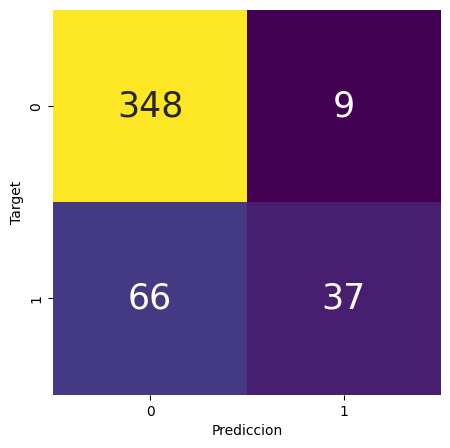

In [63]:
cm=confusion_matrix(test_target, prediccion)
import matplotlib.pyplot as plt
import seaborn as sn
# convert the ndarray to a pandas dataframe
cm_df = pd.DataFrame(cm)
# set the size of the figure
plt.figure(figsize = (5,5))
sn.heatmap(cm_df,
           annot=True, annot_kws={"size": 25},
           fmt="d",         # decimals format
           xticklabels=True,
           yticklabels=True,
           cmap="viridis",
           cbar=False)
plt.xlabel('Prediccion')
plt.ylabel('Target')

In [64]:
accuracy=accuracy_score(test_target, prediccion)
accuracy

0.8369565217391305

In [65]:
tp, fn, fp, tn = confusion_matrix(test_target , prediccion).ravel()
print("Number of true positives  (tp) = ",tp)
print("Number of true negatives  (tn) = ",tn)

print("Number of false positives (fp) = ",fp)
print("Number of false negatives (fn) = ",fn)

print("Precision                                          = tp / (tp + fp) =", tp / (tp + fp))
print("Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) =", tp / (tp + fn))
print("Specificity             (aka. true negative rate)  = tn / (tn + fp) =", tn / (tn + fp))
print("Fall out                (aka. false positive rate) = fp / (fp + tn) =", fp / (fp + tn))
print("Miss rate               (aka. false negative rate) = fn / (fn + tp) =", fn / (fn + tp))

Number of true positives  (tp) =  348
Number of true negatives  (tn) =  37
Number of false positives (fp) =  66
Number of false negatives (fn) =  9
Precision                                          = tp / (tp + fp) = 0.8405797101449275
Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) = 0.9747899159663865
Specificity             (aka. true negative rate)  = tn / (tn + fp) = 0.3592233009708738
Fall out                (aka. false positive rate) = fp / (fp + tn) = 0.6407766990291263
Miss rate               (aka. false negative rate) = fn / (fn + tp) = 0.025210084033613446


AUC =  0.6670066084686301


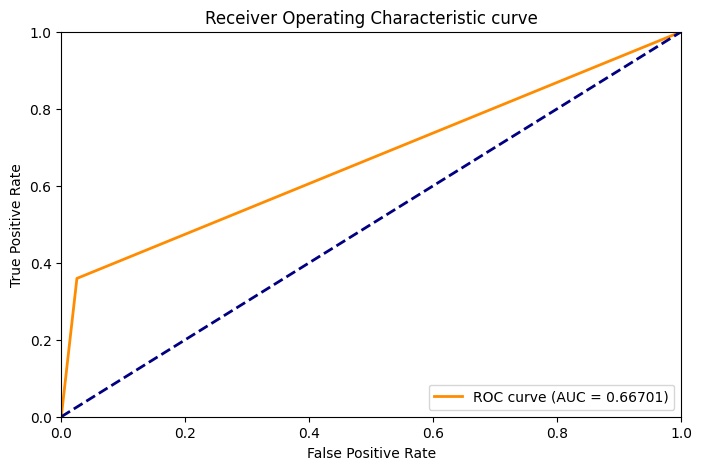

In [66]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd


fpr, tpr, thresholds = roc_curve(test_target , prediccion)

roc_auc = roc_auc_score(test_target , prediccion)
print("AUC = ", roc_auc)

plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [67]:
# Get numerical feature importances
importances = list(clf.best_estimator_.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(inputs, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Sunshine             Importance: 0.13
Variable: Humidity3pm          Importance: 0.13
Variable: Pressure9am          Importance: 0.11
Variable: Pressure3pm          Importance: 0.1
Variable: Cloud3pm             Importance: 0.07
Variable: WindGustSpeed        Importance: 0.05
Variable: Temp3pm              Importance: 0.05
Variable: MaxTemp              Importance: 0.04
Variable: Rainfall             Importance: 0.04
Variable: MinTemp              Importance: 0.03
Variable: Humidity9am          Importance: 0.03
Variable: Temp9am              Importance: 0.03
Variable: Evaporation          Importance: 0.02
Variable: WindSpeed9am         Importance: 0.02
Variable: WindSpeed3pm         Importance: 0.02
Variable: Cloud9am             Importance: 0.02
Variable: Year                 Importance: 0.02
Variable: Month                Importance: 0.02
Variable: Day                  Importance: 0.02
Variable: WindGustDir_N        Importance: 0.01
Variable: WindGustDir_SSE      Importance